#### Question 5 - Attempt one

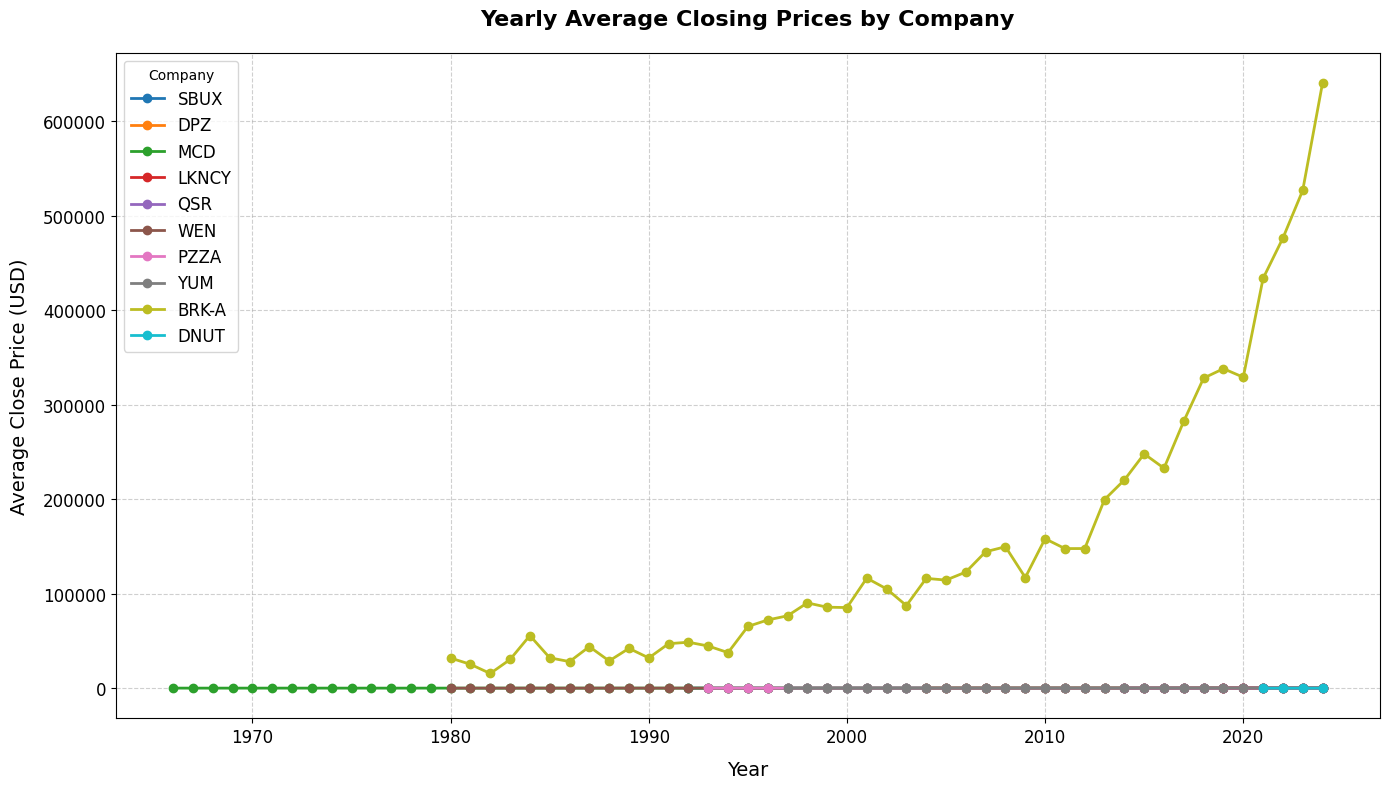

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the directory containing the data files
data_directory = "/Users/danielpace/Documents/University/Business School/MIBA/Python/Final Project/Data/ProjectDatasets/Team_4"

# Initialize a dictionary to store yearly average closing prices for each company
company_yearly_averages = {}

# Process each CSV file in the specified directory
for file_name in os.listdir(data_directory):
    if file_name.endswith('.csv'):
        # Extract the company name from the file name
        company_name = file_name.split('.')[0]
        file_path = os.path.join(data_directory, file_name)
        
        # Load the dataset into a pandas DataFrame
        data = pd.read_csv(file_path)
        
        # Ensure the Date column is in datetime format
        data['Date'] = pd.to_datetime(data['Date'])
        
        # Extract the year from the Date column
        data['Year'] = data['Date'].dt.year
        
        # Calculate the yearly average of the 'Close' prices
        yearly_average = data.groupby('Year')['Close'].mean()
        
        # Store the results in the dictionary
        company_yearly_averages[company_name] = yearly_average

# Combine all company data into a single DataFrame for visualization
yearly_average_df = pd.DataFrame(company_yearly_averages)

# Plot the data: Yearly Average Close Prices
plt.figure(figsize=(14, 8))  # Set figure size
plt.title("Yearly Average Closing Prices by Company", fontsize=16, fontweight='bold', pad=20)
plt.plot(yearly_average_df, marker='o', linewidth=2)

# Customize the x-axis and y-axis
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Average Close Price (USD)", fontsize=14, labelpad=10)

# Add gridlines
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Add a legend for company names
plt.legend(yearly_average_df.columns, title="Company", loc="upper left", fontsize=12)

# Enhance x-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

As you can see, BRK is relativly alot higher that the other stocks. My next attempt has used a logarithmic scale to standardise the data, so we can visualise everything more clearly

#### Question 5 - Attempt 2

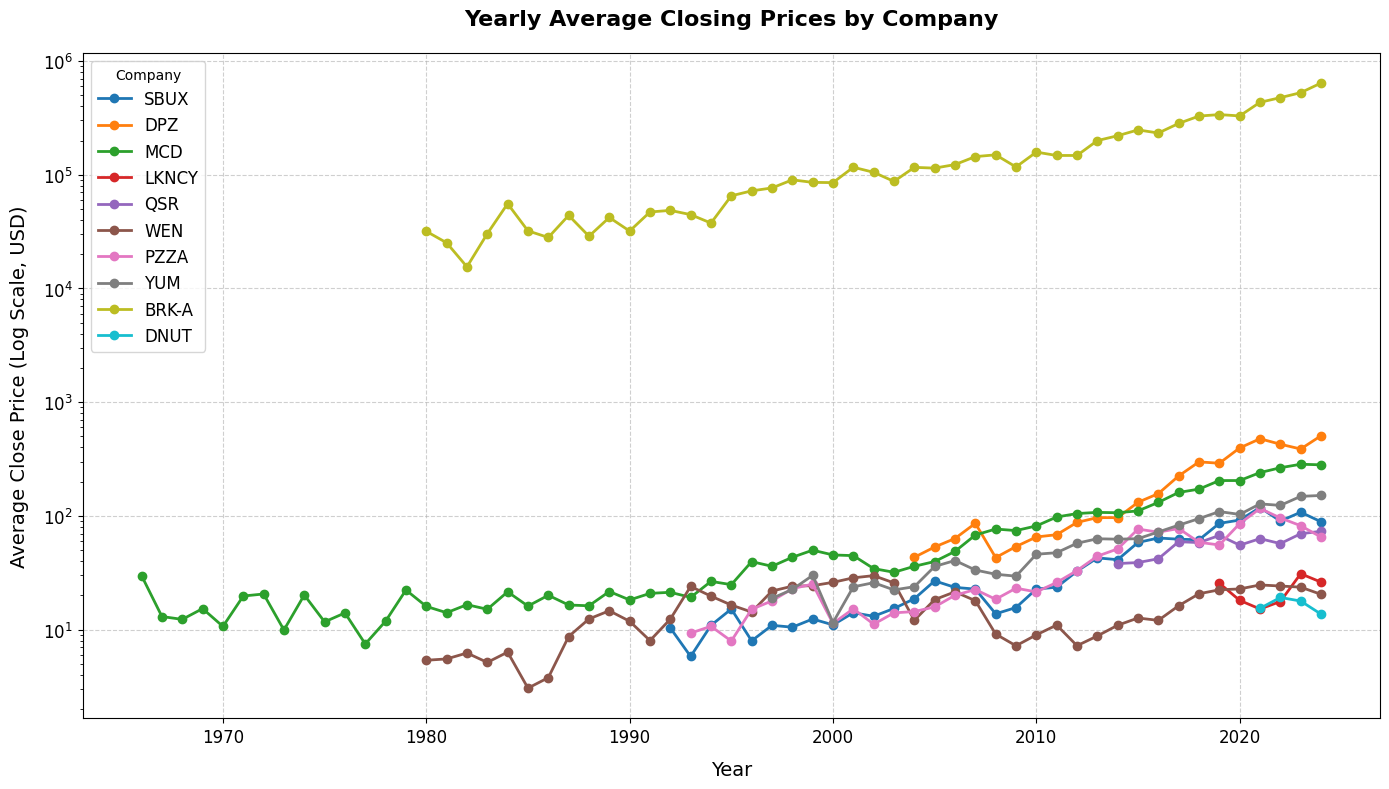

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the directory containing the data files
data_directory = "/Users/danielpace/Documents/University/Business School/MIBA/Python/Final Project/Data/ProjectDatasets/Team_4"

# Initialize a dictionary to store yearly average closing prices for each company
company_yearly_averages = {}

# Process each CSV file in the specified directory
for file_name in os.listdir(data_directory):
    if file_name.endswith('.csv'):
        # Extract the company name from the file name
        company_name = file_name.split('.')[0]
        file_path = os.path.join(data_directory, file_name)
        
        # Load the dataset into a pandas DataFrame
        data = pd.read_csv(file_path)
        
        # Ensure the Date column is in datetime format
        data['Date'] = pd.to_datetime(data['Date'])
        
        # Extract the year from the Date column
        data['Year'] = data['Date'].dt.year
        
        # Calculate the yearly average of the 'Close' prices
        yearly_average = data.groupby('Year')['Close'].mean()
        
        # Store the results in the dictionary
        company_yearly_averages[company_name] = yearly_average

# Combine all company data into a single DataFrame for visualization
yearly_average_df = pd.DataFrame(company_yearly_averages)

# Plot the data: Yearly Average Close Prices
plt.figure(figsize=(14, 8))  # Set figure size
plt.title("Yearly Average Closing Prices by Company", fontsize=16, fontweight='bold', pad=20)

# Plot each company's yearly average closing prices
for company in yearly_average_df.columns:
    plt.plot(yearly_average_df.index, yearly_average_df[company], marker='o', linewidth=2, label=company)

# Use a logarithmic scale for the y-axis to address large differences in values
plt.yscale('log')

# Customize the x-axis and y-axis
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Average Close Price (Log Scale, USD)", fontsize=14, labelpad=10)

# Add gridlines
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Add a legend for company names
plt.legend(title="Company", loc="upper left", fontsize=12)

# Enhance x-axis and y-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### Question 7

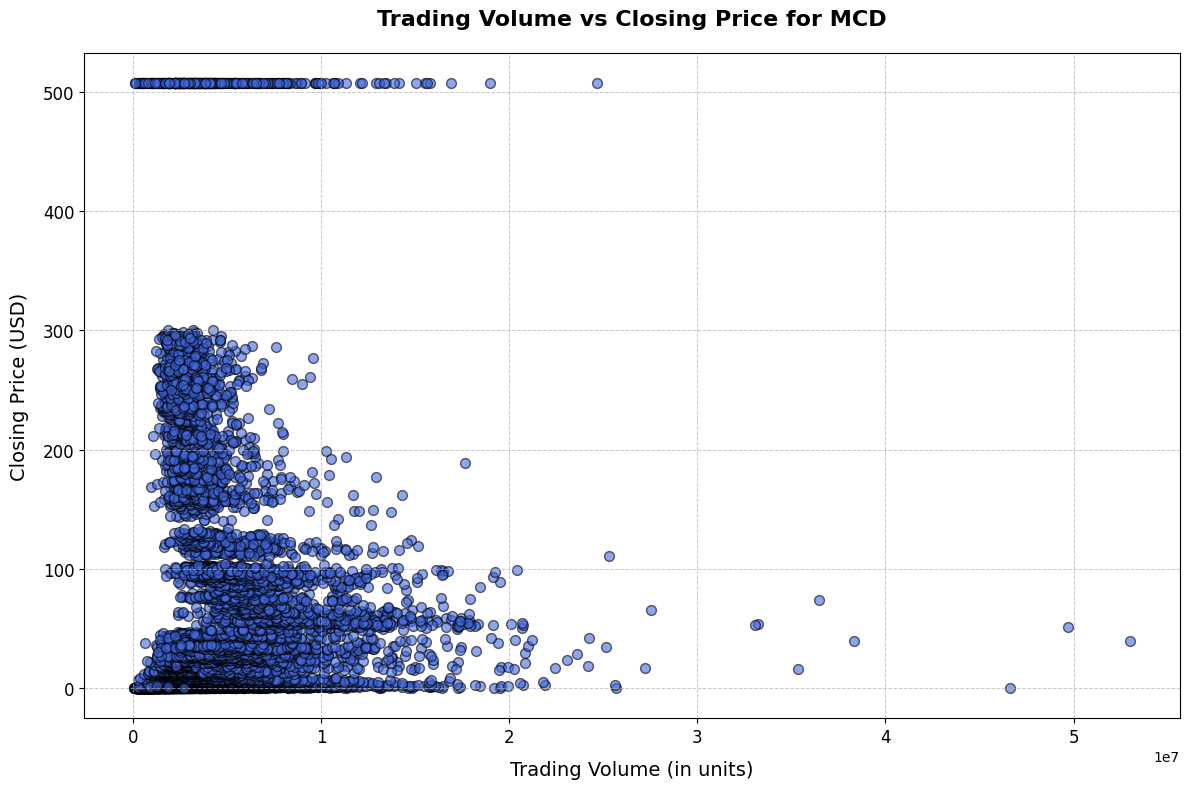

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the directory containing the data files
data_path = "/Users/danielpace/Documents/University/Business School/MIBA/Python/Final Project/Data/ProjectDatasets/Team_4"

# Specify the company of interest (company selceted : McDonald's - MCD)
selected_company = 'MCD'
file_path = os.path.join(data_path, f'{selected_company}.csv')

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a scatter plot: Trading Volume vs Close Price
plt.figure(figsize=(12, 8))  # Set figure size
plt.scatter(
    data['Volume'], 
    data['Close'], 
    alpha=0.6, 
    edgecolor='k', 
    color='royalblue', 
    s=50  # Marker size
)

# Add a title
plt.title(
    f"Trading Volume vs Closing Price for {selected_company}", 
    fontsize=16, 
    fontweight='bold', 
    pad=20
)

# Customize the x-axis and y-axis labels
plt.xlabel("Trading Volume (in units)", fontsize=14, labelpad=10)
plt.ylabel("Closing Price (USD)", fontsize=14, labelpad=10)

plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations to highlight outliers or key areas (optional)
max_volume_idx = data['Volume'].idxmax()
max_volume_point = (data.loc[max_volume_idx, 'Volume'], data.loc[max_volume_idx, 'Close'])
plt.annotate(
    'Highest Volume',
    xy=max_volume_point,
    xytext=(max_volume_point[0] * 1.1, max_volume_point[1] * 1.1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12
)

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/tl/rtlxkzzj66z03_lkg34h6wq80000gn/T/ipykernel_48729/699711661.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])


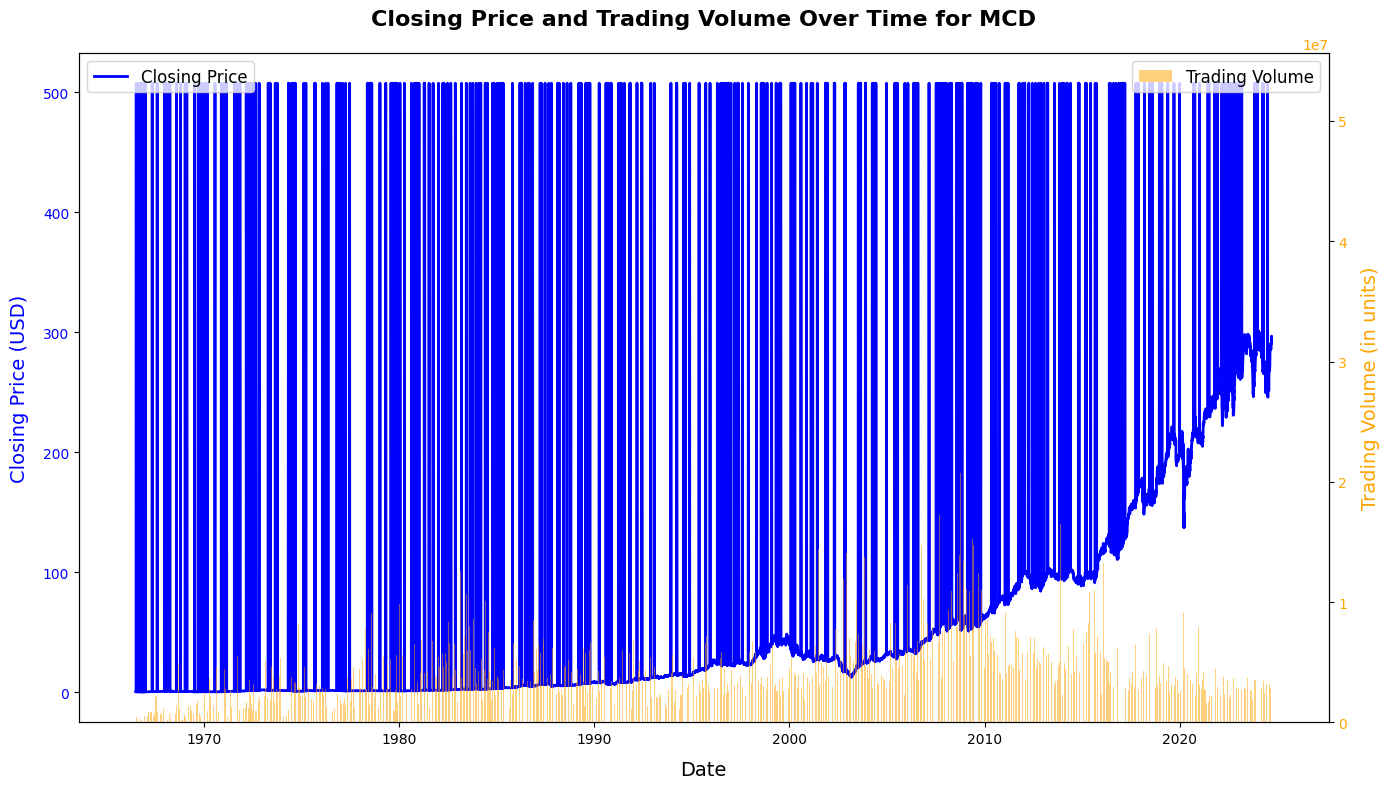

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset for a specific company (e.g., MCD for McDonald's)
file_path = "/Users/danielpace/Documents/University/Business School/MIBA/Python/Final Project/Data/ProjectDatasets/Team_4/MCD.csv"

# Read the data
data = pd.read_csv(file_path)

# Clean the data by dropping rows with missing values in critical columns
data_cleaned = data.dropna(subset=['Date', 'Close', 'Volume'])

# Ensure the 'Date' column is in datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Sort the data by date
data_cleaned = data_cleaned.sort_values(by='Date')

# Create a dual-axis plot: Closing Price and Trading Volume over time
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Closing Price on the primary y-axis
ax1.plot(data_cleaned['Date'], data_cleaned['Close'], color='blue', label='Closing Price', linewidth=2)
ax1.set_xlabel('Date', fontsize=14, labelpad=10)
ax1.set_ylabel('Closing Price (USD)', fontsize=14, labelpad=10, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Trading Volume
ax2 = ax1.twinx()
ax2.bar(data_cleaned['Date'], data_cleaned['Volume'], color='orange', alpha=0.5, label='Trading Volume')
ax2.set_ylabel('Trading Volume (in units)', fontsize=14, labelpad=10, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and grid
plt.title(f"Closing Price and Trading Volume Over Time for MCD", fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()

# Add a legend
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Display the plot
plt.show()